data source: https://www.kaggle.com/kerneler/starter-household-monthly-electricity-850d9d89-0

# Analysis of Monthly Household Energy-Related Expenditures

### Feature Descriptions:

- num_rooms: number of rooms in the house
- num_people: number of people living within the house
- housearea: area of the house (no specification on units, assuming area in sq. meters)
- is_ac: is ac present in the house?
- is_tv: is a tv present in the house?
- is_flat: is the house a flat?
- ave_monthly_income: avg income / month / household
- num_children: number of children in the household
- is_urban: is the house located in an urban setting?
- amount_paid: monthly energy bill amount

In [2]:
import pandas as pd

In [3]:
data1 = pd.read_csv('household_energy_bill_init.csv')

In [51]:
data1

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625
...,...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111
996,2,5,847.97,0,1,0,39502.92,0,0,354.472693
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314


# Forming problem / what we want to predict

### Step 1: Predict most significant predictors of monthly bill amount and then utilize Exploratory's data analysis UI to qucikly check for accuracy.

In [5]:
import numpy as np #numerical computation
import matplotlib.pyplot as plt #plotting package
%matplotlib inline
import matplotlib as mpl #more plotting
import seaborn as sns #new, fancy plotting package
mpl.rcParams['figure.dpi']=400 #high resolution matplotlib figures

In [6]:
ind_vars1 = data1.iloc[:,0:9]
ind_vars1

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban
0,3,3,742.57,1,1,1,9675.93,2,0
1,1,5,952.99,0,1,0,35064.79,1,1
2,3,1,761.44,1,1,1,22292.44,0,0
3,0,5,861.32,1,1,0,12139.08,0,0
4,1,8,731.61,0,1,0,17230.10,2,1
...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,12687.26,1,1
996,2,5,847.97,0,1,0,39502.92,0,0
997,2,4,660.94,1,0,0,10145.17,0,1
998,1,1,814.75,0,1,1,15535.05,0,1


In [8]:
dep_var1 = data1.iloc[:,-1]
dep_var1.head()

0    560.481447
1    633.283679
2    511.879157
3    332.992035
4    658.285625
Name: amount_paid, dtype: float64

In [9]:
correlation1 = data1.corr()

In [10]:
correlation1

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
num_rooms,1.000000,-0.005765,-0.033561,0.018620,-0.016146,0.004133,-0.000345,-0.037474,-0.015705,-0.023933
num_people,-0.005765,1.000000,0.000072,0.033672,0.020101,0.012104,0.019152,-0.010656,-0.023863,0.053501
housearea,-0.033561,0.000072,1.000000,0.036039,0.088323,0.007986,-0.042645,0.038699,0.024902,0.096157
is_ac,0.018620,0.033672,0.036039,1.000000,-0.000247,0.002678,-0.014054,-0.027256,-0.053317,0.390003
is_tv,-0.016146,0.020101,0.088323,-0.000247,1.000000,-0.028155,0.013664,0.015353,0.034774,0.197613
is_flat,0.004133,0.012104,0.007986,0.002678,-0.028155,1.000000,-0.014879,-0.028315,-0.000066,0.147927
ave_monthly_income,-0.000345,0.019152,-0.042645,-0.014054,0.013664,-0.014879,1.000000,0.008329,-0.039424,0.025889
num_children,-0.037474,-0.010656,0.038699,-0.027256,0.015353,-0.028315,0.008329,1.000000,-0.007511,0.447512
is_urban,-0.015705,-0.023863,0.024902,-0.053317,0.034774,-0.000066,-0.039424,-0.007511,1.000000,0.649568
amount_paid,-0.023933,0.053501,0.096157,0.390003,0.197613,0.147927,0.025889,0.447512,0.649568,1.000000


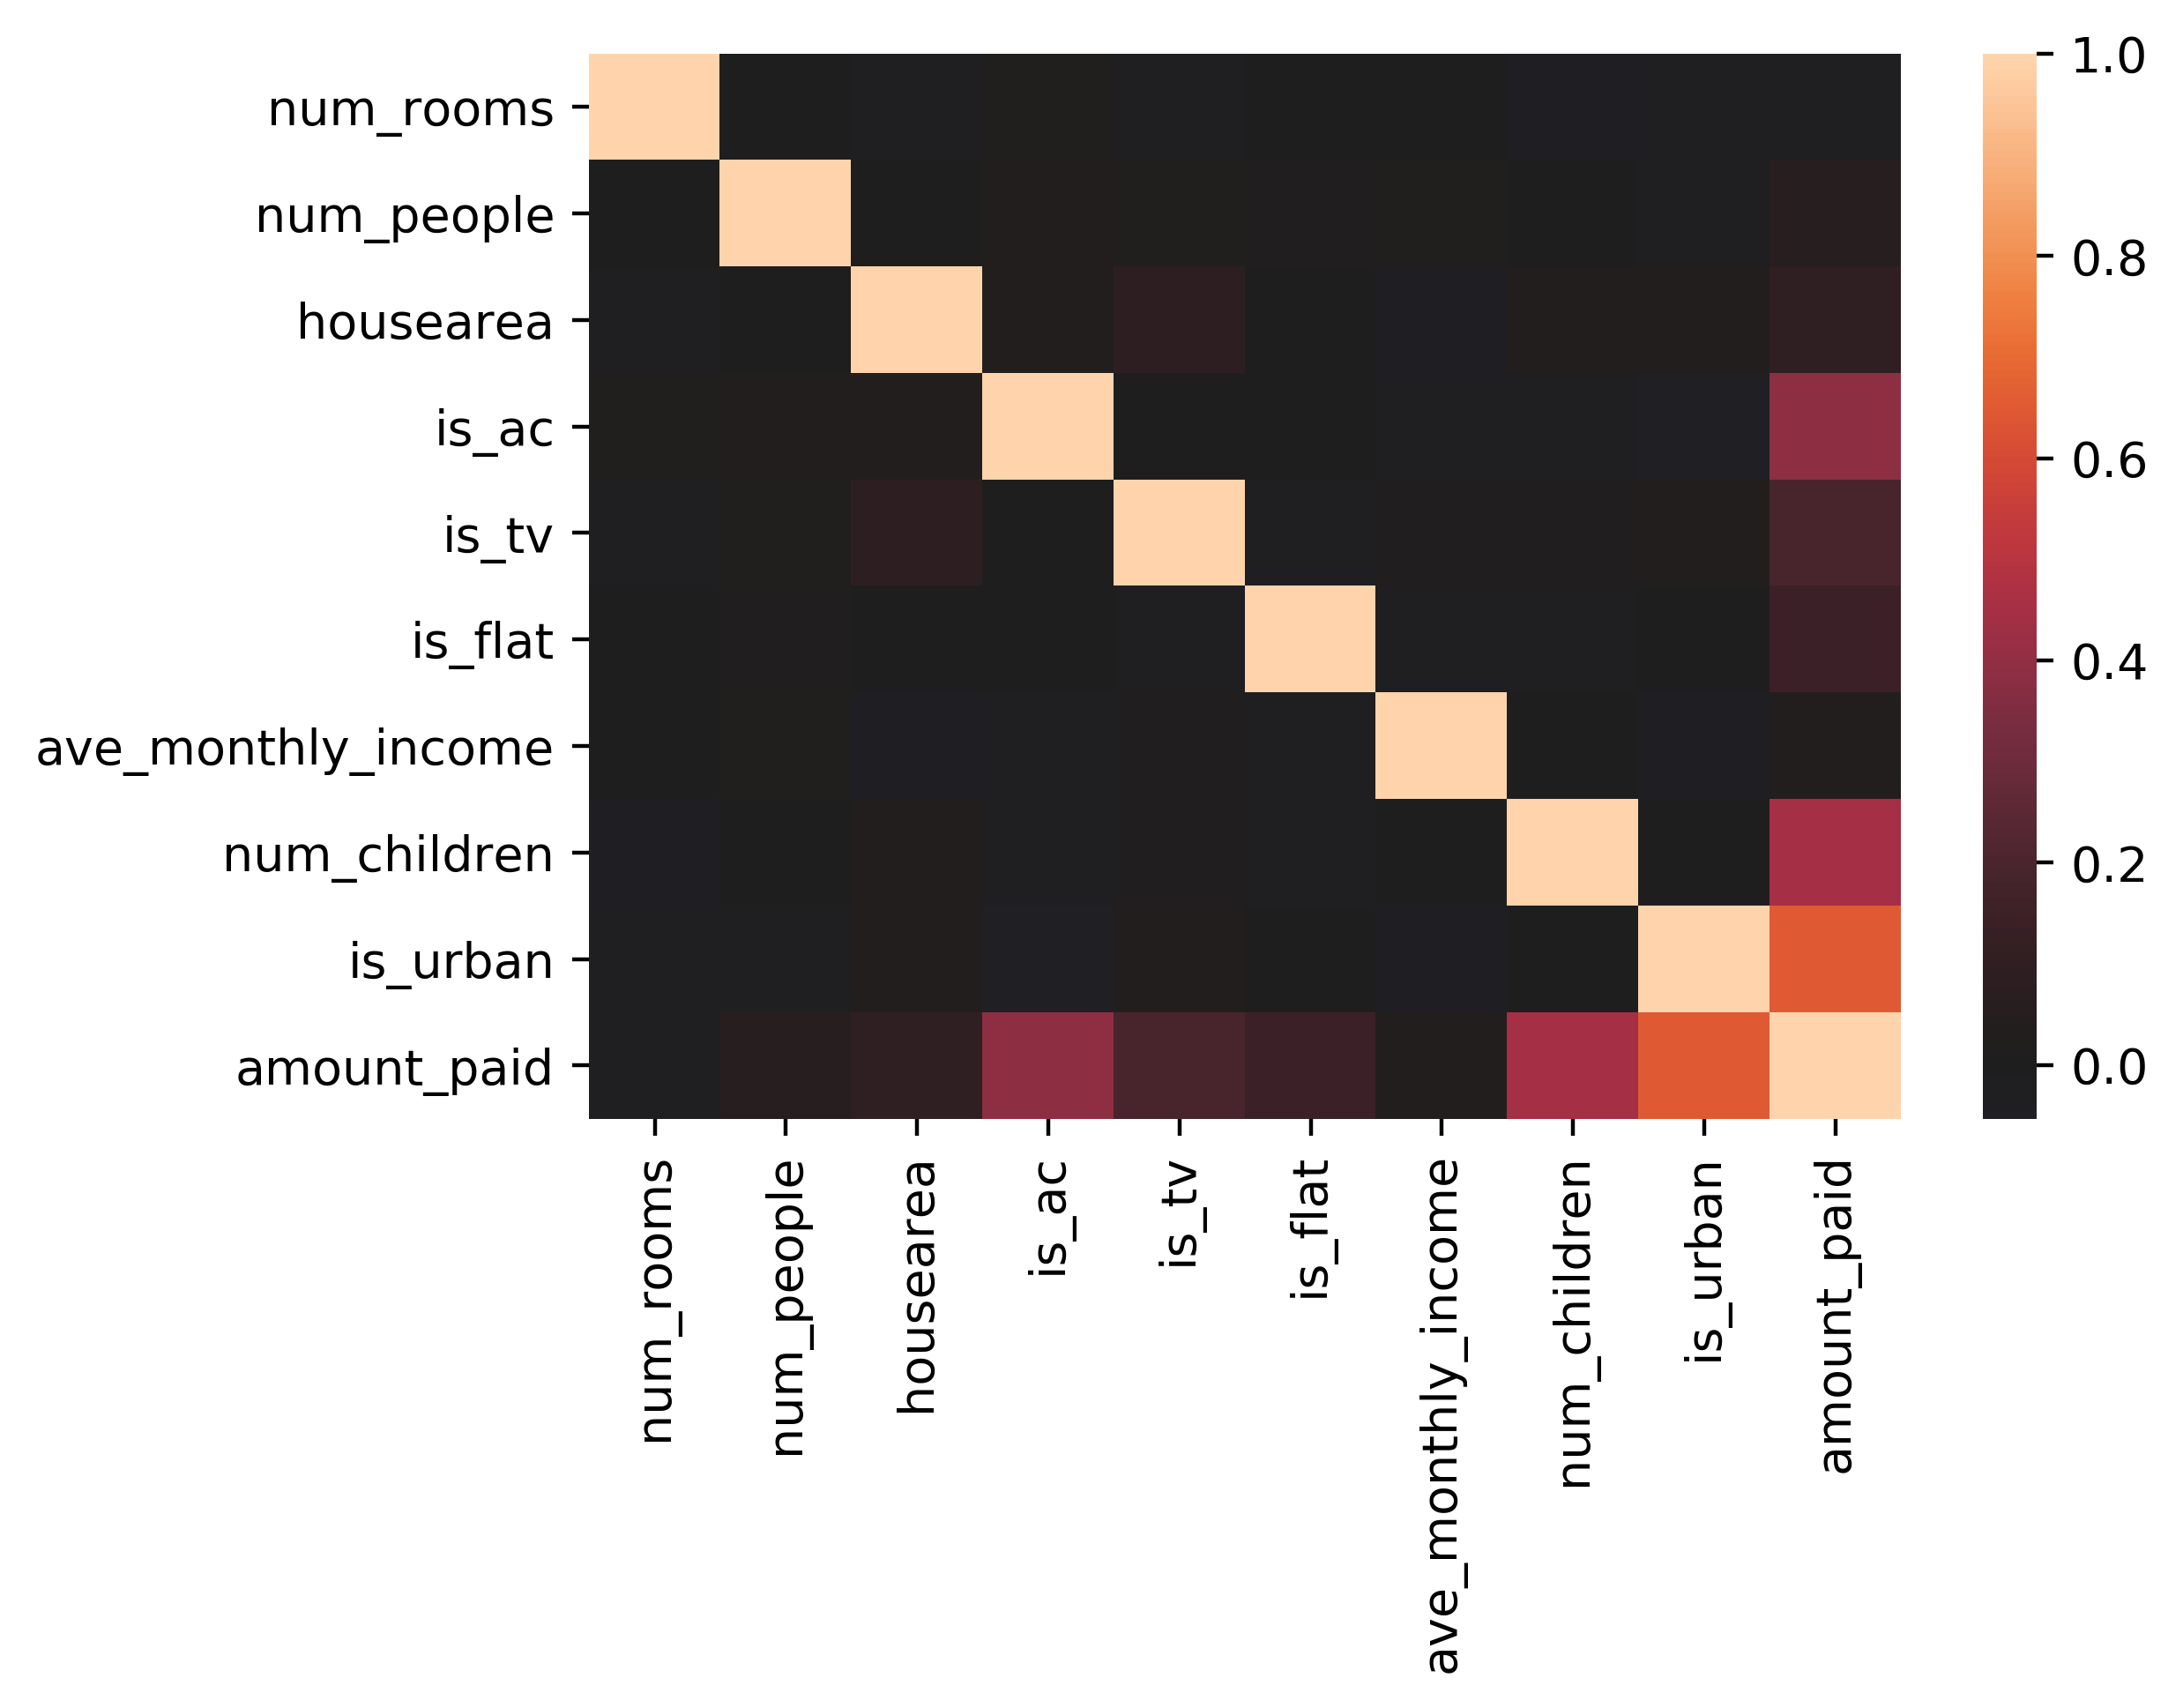

In [11]:
sns.heatmap(correlation1, xticklabels=correlation1.columns.values,
            yticklabels=correlation1.columns.values, center = 0)

In [12]:
amount_corr1 = correlation1.iloc[-1, :]
amount_corr1

num_rooms            -0.023933
num_people            0.053501
housearea             0.096157
is_ac                 0.390003
is_tv                 0.197613
is_flat               0.147927
ave_monthly_income    0.025889
num_children          0.447512
is_urban              0.649568
amount_paid           1.000000
Name: amount_paid, dtype: float64

In [13]:
amount_corr1 = amount_corr1.sort_values()
amount_corr1

num_rooms            -0.023933
ave_monthly_income    0.025889
num_people            0.053501
housearea             0.096157
is_flat               0.147927
is_tv                 0.197613
is_ac                 0.390003
num_children          0.447512
is_urban              0.649568
amount_paid           1.000000
Name: amount_paid, dtype: float64

Top 5 most significant correlation values (desc):

- is_urban
- num_children
- is_ac
- is_tv
- is_flat

In [14]:
sig_corr1 = amount_corr1.iloc[-6::]

In [15]:
sig_corr1

is_flat         0.147927
is_tv           0.197613
is_ac           0.390003
num_children    0.447512
is_urban        0.649568
amount_paid     1.000000
Name: amount_paid, dtype: float64

In [16]:
sig_corr1.tolist()

[0.14792657834181372,
 0.19761274362116457,
 0.3900028129199385,
 0.44751233714142713,
 0.6495680816675579,
 1.0]

In [17]:
sig_corr1_dict = {
    'is_flat':sig_corr1[0],
    'is_tv':sig_corr1[1],
    'is_ac':sig_corr1[2],
    'num_children':sig_corr1[3],
    'is_urban':sig_corr1[4]
}

In [18]:
sig_corr1_dict

{'is_flat': 0.14792657834181372,
 'is_tv': 0.19761274362116457,
 'is_ac': 0.3900028129199385,
 'num_children': 0.44751233714142713,
 'is_urban': 0.6495680816675579}

### Step 2: Compare with Exploratory Results

__Column - - - - - Column - - - - - Correlation value__

amount_paid -- amount_paid -- 1.0000000000

amount_paid	-- ave_monthly_income -- 0.0258885018034025

amount_paid	-- housearea -- 0.0961565276562585

amount_paid	-- is_ac -- 0.390002812919939

amount_paid	-- is_flat -- 0.147926578341814

amount_paid	-- is_tv -- 0.197612743621165

amount_paid	-- is_urban -- 0.649568081667556

amount_paid	-- num_children -- 0.447512337141428

amount_paid	-- num_people -- 0.0535010135220474

amount_paid	-- num_rooms -- -0.0239329719294111

Shown above are the correlation results among all features. I extracted only the 'amount_paid' correlation values because that is the feature we are trying to predict.

Shown below are the values of the 5 most significant predictors.

In [42]:
exploratory_corr_dict = {
    'is_flat': 0.147926578341814,
    'is_tv': 0.197612743621165,
    'is_ac':0.390002812919939,
    'num_children':0.447512337141428,
    'is_urban':0.649568081667556
}

In [43]:
exploratory_corr_dict

{'is_flat': 0.147926578341814,
 'is_tv': 0.197612743621165,
 'is_ac': 0.390002812919939,
 'num_children': 0.447512337141428,
 'is_urban': 0.649568081667556}

In [44]:
sig_corr1_dict

is_flat         0.147927
is_tv           0.197613
is_ac           0.390003
num_children    0.447512
is_urban        0.649568
dtype: float64

In [45]:
sig_corr1_dict = pd.Series(sig_corr1_dict)
exploratory_corr_dict = pd.Series(exploratory_corr_dict)

In [46]:
corr_diff = sig_corr1_dict - exploratory_corr_dict
corr_diff

is_flat        -2.775558e-16
is_tv          -4.163336e-16
is_ac          -4.996004e-16
num_children   -8.881784e-16
is_urban        1.887379e-15
dtype: float64

In [50]:
corr_diff.round(10)

is_flat        -0.0
is_tv          -0.0
is_ac          -0.0
num_children   -0.0
is_urban        0.0
dtype: float64

### The difference between the automated correlation results in Exploratory and the correlation results I made using Pandas, NumPy, and Seaborn are 0 (rounded 10 decimal places).